# End-to-end Multil-class e-commerce  Classification
* This notebook builds an end-to-end multi-class image classifierdeep learning based image classifier using TensorFlow(2.2.0) and keras.

## 1.Problem
* To classify whether images contain either a saree or a shirt or t-shirt.

## 2.Data
* The data we're using is from amazon website where scrap the images of saree,shirt and t-shirts.

* https://www.amazon.in/ref=nav_logo

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each Saree,shirt and t-shirt of each test image.

## 4.Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is saree,shirt or t-shirt (0 = saree,2=shirt,1=t-shirt)
* There are around 240 images in the training set.
* There are around 60 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
import os
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop

import random




## Explore the Data


In [2]:
my_data_dir = './clothes'
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 


['test', 'train']

In [3]:
# Get filenames in list
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [4]:
os.listdir(test_path)

['Saree', 'shirts', 'Tshirts']

In [5]:
os.listdir(train_path)

['Saree', 'shirts', 'Tshirts']

In [6]:
os.listdir(train_path+'\\Saree')[0]

'img_10.jpeg'

### lets see sample image


Visualize a sample of the image
Shape of image (320, 198, 3)


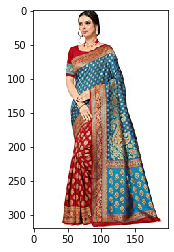

In [7]:
Saree = train_path+'\\Saree'+'\\img_10.jpeg'
print ('Visualize a sample of the image')
saree_img= imread(Saree)

plt.imshow(saree_img)
print("Shape of image",saree_img.shape)

## Let's check how many images there are in test and train 


In [8]:
saree_dir_train = "./clothes/train/Saree"
shirt_dir_train = "./clothes/train/shirts"
t_shirt_dir_train = "./clothes/train/Tshirts"

saree_dir_test = "./clothes/test/Saree"
shirt_dir_test = "./clothes/test/shirts"
t_shirt_dir_test = "./clothes/test/Tshirts"
print("no of images of saree in train dataset ",len(os.listdir(saree_dir_train)))
print("no of images of shirts in train dataset ",len(os.listdir(shirt_dir_train)))
print("no of images of t-shirts in train dataset ",len(os.listdir(t_shirt_dir_train)))

print("no of images of saree in test dataset ",len(os.listdir(saree_dir_test)))
print("no of images of shirts in test dataset ",len(os.listdir(shirt_dir_test)))
print("no of images of t-shirts in test dataset ",len(os.listdir(t_shirt_dir_test)))





no of images of saree in train dataset  70
no of images of shirts in train dataset  70
no of images of t-shirts in train dataset  70
no of images of saree in test dataset  30
no of images of shirts in test dataset  30
no of images of t-shirts in test dataset  30


## Building Model


In [9]:
input_shape=(128,128,3)
img_width=128
img_height=128

batch_size=12
epoch=100

train_data_dir='./clothes/train'
validation_data_dir='./clothes/test'

nb_train_samples=70
nb_validation_samples=30

model=Sequential()

# This is the first convolution

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the Second convolution

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the third convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the fourth convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten the results to feed into a DNN


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
print(model.summary())


model.compile(loss='categorical_crossentropy',optimizer = RMSprop(lr = 0.001),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0

## Data Augmentation

In [10]:
train_generator_augmented=ImageDataGenerator(
                               rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.3, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.3, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                            )

## Data Preprocessing


In [11]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=32, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 90 images belonging to 3 classes.
Found 210 images belonging to 3 classes.


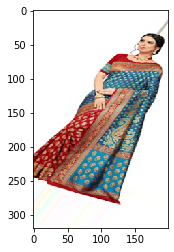

In [12]:
# checking image after applying data augmentation technique
plt.imshow(train_generator_augmented.random_transform(saree_img))

In [13]:
# checking class indices
train_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

## EarlyStopping and ModelCheckpoint

In [14]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Training

In [15]:
history = model.fit(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.3195 - accuracy: 0.3833
Epoch 00001: val_accuracy improved from -inf to 0.46875, saving model to best_model.h5
5/5 [==============================] - 1s 230ms/step - loss: 1.3195 - accuracy: 0.3833 - val_loss: 1.0952 - val_accuracy: 0.4688
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 1.1087 - accuracy: 0.3500
Epoch 00002: val_accuracy improved from 0.46875 to 0.67188, saving model to best_model.h5
5/5 [==============================] - 1s 195ms/step - loss: 1.1087 - accuracy: 0.3500 - val_loss: 1.0898 - val_accuracy: 0.6719
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 1.1136 - accuracy: 0.3333
Epoch 00003: val_accuracy did not improve from 0.67188
5/5 [==============================] - 1s 194ms/step - loss: 1.1136 - accuracy: 0.3333 - val_loss: 1.0933 - val_accuracy: 0.4844
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1.0758 - accuracy: 0.4167
Epoch 000

Epoch 30/100
5/5 [==============================] - ETA: 0s - loss: 1.0343 - accuracy: 0.5741
Epoch 00030: val_accuracy did not improve from 0.82812
5/5 [==============================] - 1s 211ms/step - loss: 1.0343 - accuracy: 0.5741 - val_loss: 0.8362 - val_accuracy: 0.6250
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.8833 - accuracy: 0.6000
Epoch 00031: val_accuracy did not improve from 0.82812
5/5 [==============================] - 1s 207ms/step - loss: 0.8833 - accuracy: 0.6000 - val_loss: 0.7274 - val_accuracy: 0.7656
Epoch 32/100
5/5 [==============================] - ETA: 0s - loss: 0.8325 - accuracy: 0.6500
Epoch 00032: val_accuracy did not improve from 0.82812
5/5 [==============================] - 1s 211ms/step - loss: 0.8325 - accuracy: 0.6500 - val_loss: 0.5984 - val_accuracy: 0.8125
Epoch 33/100
5/5 [==============================] - ETA: 0s - loss: 0.7720 - accuracy: 0.6333
Epoch 00033: val_accuracy did not improve from 0.82812
5/5 [============

Epoch 60/100
5/5 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.7000
Epoch 00060: val_accuracy did not improve from 0.85938
5/5 [==============================] - 1s 205ms/step - loss: 0.6696 - accuracy: 0.7000 - val_loss: 0.4170 - val_accuracy: 0.8438
Epoch 61/100
5/5 [==============================] - ETA: 0s - loss: 0.6112 - accuracy: 0.7407
Epoch 00061: val_accuracy did not improve from 0.85938
5/5 [==============================] - 1s 189ms/step - loss: 0.6112 - accuracy: 0.7407 - val_loss: 0.4325 - val_accuracy: 0.8438
Epoch 62/100
5/5 [==============================] - ETA: 0s - loss: 0.8353 - accuracy: 0.5500
Epoch 00062: val_accuracy did not improve from 0.85938
5/5 [==============================] - 1s 208ms/step - loss: 0.8353 - accuracy: 0.5500 - val_loss: 0.5090 - val_accuracy: 0.7656
Epoch 63/100
5/5 [==============================] - ETA: 0s - loss: 0.6065 - accuracy: 0.7407
Epoch 00063: val_accuracy did not improve from 0.85938
5/5 [============

In [16]:
from tensorflow.keras.models import load_model
model.save('clothes_detector.h5')

In [17]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.319460,0.383333,1.095200,0.468750
1,1.108710,0.350000,1.089793,0.671875
2,1.113641,0.333333,1.093272,0.484375
3,1.075794,0.416667,0.977812,0.468750
4,1.020307,0.533333,1.125001,0.171875
...,...,...,...,...
95,0.633400,0.722222,0.580339,0.687500
96,0.760518,0.666667,0.429609,0.781250
97,0.698292,0.716667,0.346360,0.859375
98,0.549619,0.733333,0.446327,0.765625


## Evaluating Accuracy and Loss for the Model


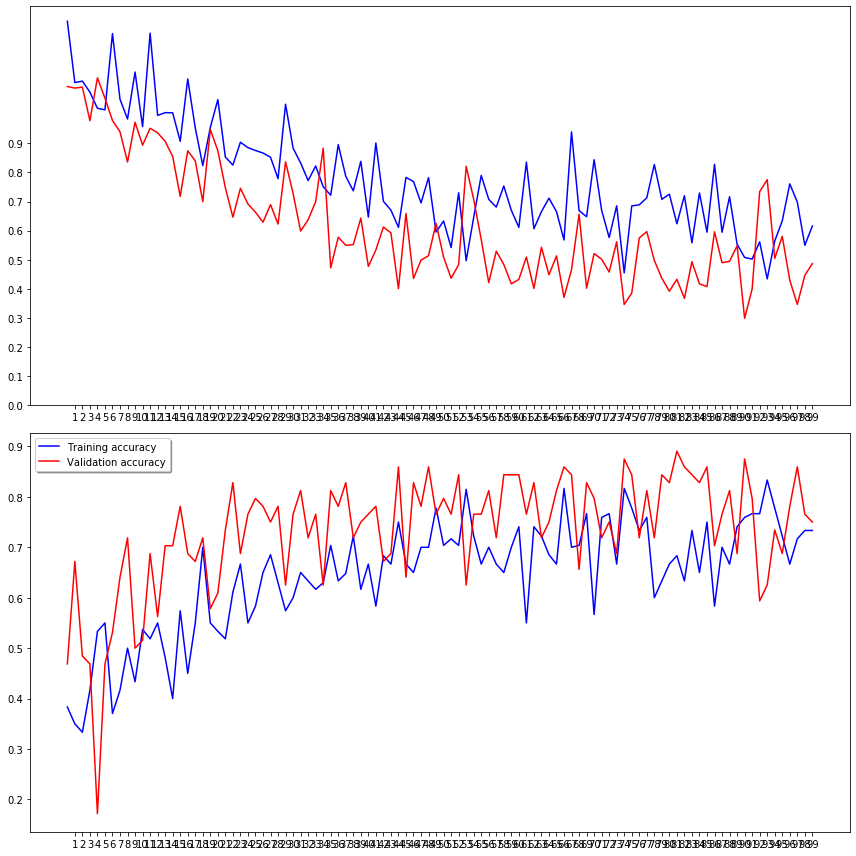

In [18]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,91))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res.head(50)
#res.to_csv("output.csv", index = False)

[0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 1 1 1 1 1 2
 1 1 1 1 2 2 1 2 1 1 2 1 1 2 1 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]


,ImageId,Predicted_Label,Actual_Label
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,2,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = model.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<Figure size 432x288 with 0 Axes>

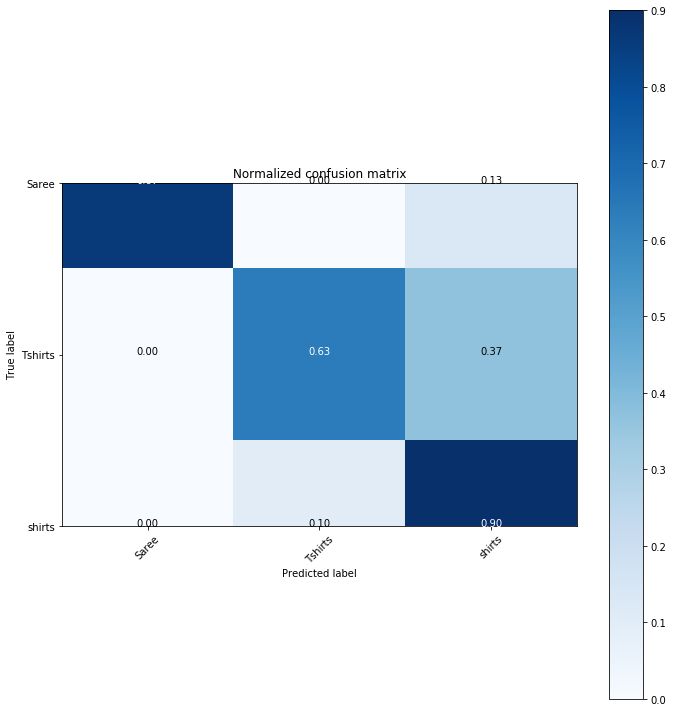

In [22]:
# show the confusion matrix of our predictions

# compute predictions
y_pred = [np.argmax(probas) for probas in pred]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

## Predicting on an Image

In [23]:
os.listdir(test_path+'\\Saree')[21]

'img_324.jpeg'

In [24]:
os.listdir(test_path+'\\shirts')[29]

'img_259.jpeg'

In [25]:
validation_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

In [26]:
from keras.models import load_model

saved_model = load_model('best_model.h5')

[0]


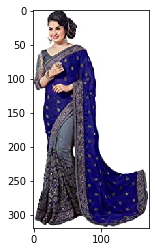

In [27]:
img = image.load_img(test_path+'\\Saree'+'\\img_324.jpeg')
                            
test_image = image.load_img(test_path+'\\Saree'+'\\img_324.jpeg', 
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
plt.imshow(img)
test_image = np.expand_dims(test_image, axis=0)
result = saved_model.predict(test_image)
print(np.argmax(result, axis=1))

[2]


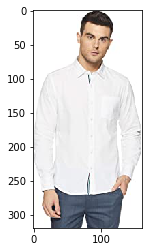

In [28]:
img = image.load_img(test_path+'\\shirts'+'\\img_259.jpeg')
                            
test_image = image.load_img(test_path+'\\shirts'+'\\img_259.jpeg', 
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
plt.imshow(img)
test_image = np.expand_dims(test_image, axis=0)
result = saved_model.predict(test_image)
print(np.argmax(result, axis=1))

## Lets predict all the images of test dataset using openCV

In [1]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 12)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

NameError: name 'os' is not defined